In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns
import re
%matplotlib inline


In [116]:
data_train = pd.read_csv('/Users/zp/Desktop/data_mining/Tianchi/Titanic/train.csv')
data_test = pd.read_csv('/Users/zp/Desktop/data_mining/Tianchi/Titanic/test.csv')
# print(data_train.head())
# print('test data')
# print(data_test.info())
# print(data_train.info())
# print(data_train.describe())



# simple version

1.linear regression

In [117]:
# list(data_train)

In [121]:
predictors = ['Pclass','Age','SibSp','Parch','Fare']
data_train['Age'].fillna( data_train['Age'].median(), inplace=True )
data_test['Age'].fillna(data_test['Age'].median(), inplace=True)
data_test['Fare'].fillna(data_test['Fare'].mode().loc[0], inplace=True)
data_test.info()
# data_test['Fare'].mode().loc[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [98]:
data_train.Age.describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [99]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

lr = LinearRegression()
# train_X = data_train[predictors]
# train_Y = data_train['Survived']

kf = KFold(n_splits=3,shuffle=False,random_state=1)

test_preds = []
for train_index, test_index in kf.split(data_train):
    print( 'train_index:',len(train_index) )
    print('test index:',len(test_index))
    train_X = data_train.loc[train_index, predictors]
    train_Y = data_train.loc[train_index, 'Survived']
    test_X = data_train.loc[test_index, predictors]
    test_Y = data_train.loc[test_index,'Survived']
    lr.fit(train_X, train_Y)
    test_pred = lr.predict(test_X)
    test_preds.append(test_pred)
preds = np.concatenate((test_preds), axis=0)
print(np.shape(test_preds))
print(np.shape(preds))

train_index: 594
test index: 297
train_index: 594
test index: 297
train_index: 594
test index: 297
(3, 297)
(891,)


In [101]:
preds[preds<=0.5] = 0
preds[preds>0.5] = 1
accuracy = sum(preds == data_train['Survived'])/ len(data_train)
print('lenear reg accuracy is:', accuracy)

lenear reg accuracy is: 0.7037037037037037


Logistic Resgression

In [102]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=1)
lr.fit(data_train[predictors], data_train['Survived'])
scores = model_selection.cross_val_score(lr, data_train[predictors], data_train['Survived'],cv=3)

print('logistic regression original accuracy:', scores)


logistic regression original accuracy: [0.66329966 0.71717172 0.71717172]


add two features sex and embarked

In [103]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [122]:
data_train.loc[data_train['Sex']=='male','Sex'] = 0
data_train.loc[data_train['Sex']=='female','Sex'] = 1
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [105]:
data_train.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 83.6+ KB


In [106]:
data_train['Embarked'].mode().loc[0]
data_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [123]:
data_train['Embarked'].fillna('S',inplace=True)
dict_embarked = {'S':0,'C':1,'Q':2}
data_train['Embarked'] = data_train['Embarked'].map(dict_embarked)

In [108]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [109]:
predictors.extend(['Sex','Embarked'])
predictors

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']

In [110]:
#logistic regression

lr = LogisticRegression(random_state=1)
lr.fit(data_train[predictors], data_train['Survived'])
scores = model_selection.cross_val_score( lr, data_train[predictors], data_train['Survived'],cv=3 )
print('after add two feature accuracy:',scores,np.mean(scores),scores.mean())


after add two feature accuracy: [0.78451178 0.78787879 0.79124579] 0.7878787878787877 0.7878787878787877


In [111]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [114]:
# predictors.remove('Sex')
# predictors.remove('Embarked')
print(predictors)
dict_sex = {'female':0,'male':1}
data_test['Sex'] = data_test['Sex'].map(dict_sex)
data_test['Embarked'] = data_test['Embarked'].map(dict_embarked)
data_test['Fare'].fillna( data_test['Fare'].mode().loc[0], inplace=True )
data_test['Age'].fillna(data_test['Fare'].median(),inplace=True)
data_test.head()

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,0


In [115]:
data_test['Survived'] = lr.predict( data_test[predictors] )
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,2,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,0,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,2,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,0,0


3. RandomFroest

In [124]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10,random_state=1, min_samples_split=2, min_samples_leaf=1)
kf = model_selection.KFold(n_splits=3,shuffle=False,random_state=1)

scores = model_selection.cross_val_score(rf, data_train[predictors], data_train['Survived'],cv=kf)
print('randomforest accuracy: ', scores, scores.mean())


randomforest accuracy:  [0.65656566 0.65319865 0.64646465] 0.6520763187429854


In [126]:
rf = RandomForestClassifier(n_estimators=30,random_state=1,min_samples_split=2, min_samples_leaf=1)
kf = model_selection.KFold(n_splits=10, shuffle=False, random_state=1)

scores = model_selection.cross_val_score( rf, data_train[predictors], data_train['Survived'],cv=kf )
print(scores,scores.mean())


[0.62222222 0.70786517 0.66292135 0.60674157 0.68539326 0.70786517
 0.66292135 0.71910112 0.69662921 0.73033708] 0.6801997503121099


# hard version

1. explore the data

In [128]:
data_train = pd.read_csv('/Users/zp/Desktop/data_mining/Tianchi/Titanic/train.csv')
data_test = pd.read_csv('/Users/zp/Desktop/data_mining/Tianchi/Titanic/test.csv')
print(data_train.head())
print('test data')
print(data_test.info())
print(data_train.info())
print(data_train.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
te

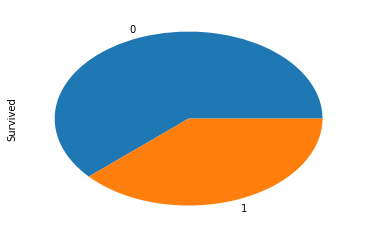

In [132]:
data_train['Survived'].value_counts().plot.pie()

In [133]:
list(data_train)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

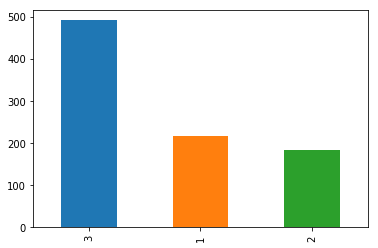

In [136]:
data_train['Pclass'].value_counts().plot(kind='bar')

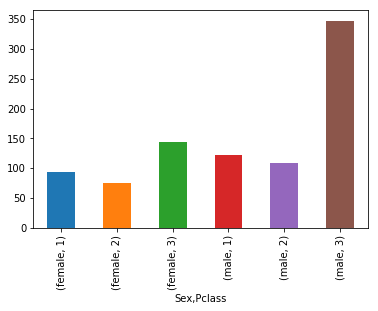

In [140]:
data_train.groupby(['Sex','Pclass'])['Survived'].count().plot.bar()

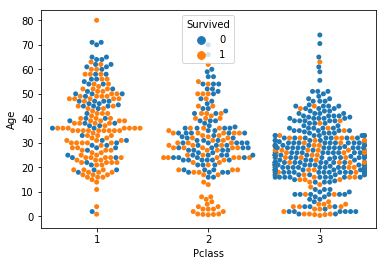

In [141]:
sns.swarmplot('Pclass','Age',hue='Survived',data=data_train)

In [143]:
sns.histplot(data_train['Age'])

AttributeError: module 'seaborn' has no attribute 'histplot'

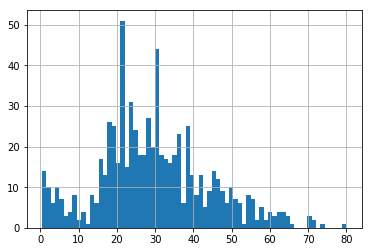

In [145]:
data_train['Age'].hist(bins=70)

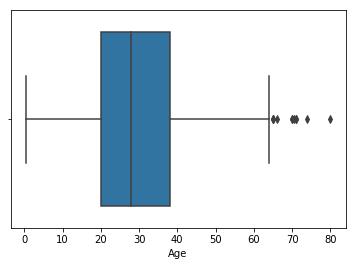

In [146]:
sns.boxplot(data_train['Age'])

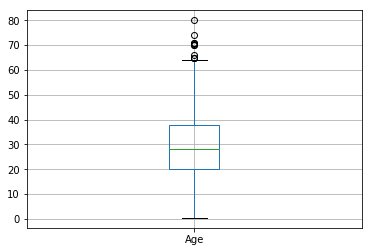

In [148]:
data_train.boxplot(column='Age')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


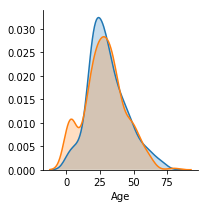

In [149]:
facet = sns.FacetGrid(data_train, hue='Survived')
facet.map(sns.kdeplot, 'Age',shade=True)

In [158]:
data_train.info()
# data_train['Age'].fillna(data_train['Age'].median(),inplace=True)
data_train['Age'] = data_train['Age'].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [159]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


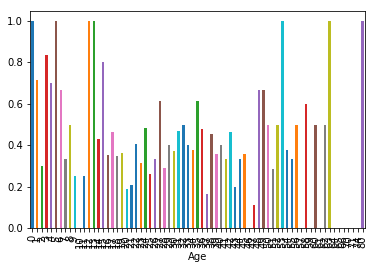

In [161]:
data_train.groupby('Age')['Survived'].mean().plot.bar()

In [163]:
data_train.Age.describe()

count    891.000000
mean      29.345679
std       13.028212
min        0.000000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [166]:
bins = [0,12,18,65,100]
data_train['Age_bins'] = pd.cut(data_train['Age'],bins)
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bins
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,"(18, 65]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,"(18, 65]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,"(18, 65]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,"(18, 65]"
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,"(18, 65]"


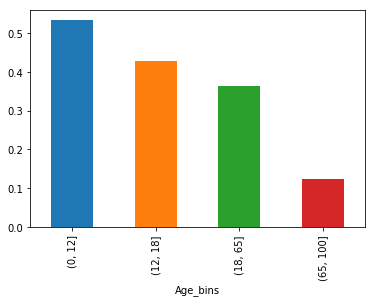

In [169]:
data_train.groupby('Age_bins')['Survived'].mean().plot.bar()

In [175]:
# data_train['Title'] = data_train['Name'].map(lambda x: re.compile('([A-Za-z]+)\.').search(x).group(1) )
data_train['Title'] = data_train['Name'].str.extract('([A-Za-z]+)\.')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bins,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,"(18, 65]",Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,"(18, 65]",Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,"(18, 65]",Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,"(18, 65]",Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,"(18, 65]",Mr


In [176]:
pd.crosstab(data_train['Title'], data_train['Sex']).head()

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6


In [183]:
data_train['Sex_new'] = data_train['Sex'].map(dict_sex)
pd.pivot_table(index='Title',values='Survived', columns= 'Sex_new', data= data_train).head()

Sex_new,0,1
Title,,
Capt,NaN,0.000000
Col,NaN,0.500000
Countess,1.0,NaN
Don,NaN,0.000000
Dr,1.0,0.333333


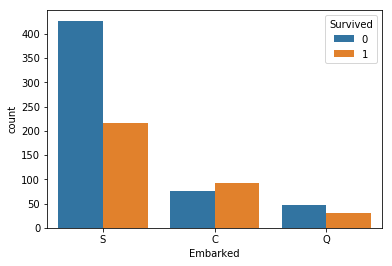

In [184]:
sns.countplot('Embarked',hue='Survived',data=data_train)

In [185]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bins,Title,Sex_new
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,"(18, 65]",Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,"(18, 65]",Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,"(18, 65]",Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,"(18, 65]",Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,"(18, 65]",Mr,1


In [188]:
embarked_dummies = pd.get_dummies(data_train['Embarked'])
data_train = data_train.join(embarked_dummies)
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bins,Title,Sex_new,0,1
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,0,"(18, 65]",Mr,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,1,"(18, 65]",Mrs,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,0,"(18, 65]",Miss,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,0,"(18, 65]",Mrs,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,0,"(18, 65]",Mr,1,1,0


In [194]:
data_train['Fare_bins'] = pd.qcut(data_train['Fare'],5)
data_train['Fare_bins'] = pd.factorize(data_train['Fare_bins'])[0]
fare_dummies = pd.get_dummies(data_train['Fare_bins']).rename(columns= lambda x: 'Fare_'+str(x))
# data_train = data_train.join(fare_dummies)
data_train = pd.concat([data_train, fare_dummies],axis=1)
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Fare_0,Fare_1,Fare_2,Fare_3,Fare_4,Fare_0,Fare_1,Fare_2,Fare_3,Fare_4
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,...,1,0,0,0,0,1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,...,0,0,1,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,...,0,1,0,0,0,0,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,...,0,0,1,0,0,0,0,1,0,0


In [361]:
data_train = pd.read_csv('/Users/zp/Desktop/data_mining/Tianchi/Titanic/train.csv')
data_test = pd.read_csv('/Users/zp/Desktop/data_mining/Tianchi/Titanic/test.csv')
# print(data_train.head())
# print('test data')
# print(data_test.info())
# print(data_train.info())
# print(data_train.describe())

print(data_train.shape)
print(data_test.shape)
data_test['Survived'] = 0
combined = pd.concat( [data_train,data_test],axis=0 )
# combined = data_train.append(data_test)

(891, 12)
(418, 11)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


In [219]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [220]:
combined['Embarked'].fillna( combined['Embarked'].mode().loc[0], inplace=True )
combined['Embarked'] = pd.factorize(combined.Embarked)[0]
combined = combined.join( pd.get_dummies(combined.Embarked).rename(columns=lambda x: 'Embarked_'+str(x) ))
combined.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Embarked_0,Embarked_1,Embarked_2
0,22.0,NaN,0,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,1,0,0
0,22.0,NaN,0,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,0,0,1
0,34.5,NaN,2,7.8292,"Kelly, Mr. James",0,892,3,male,0,0,330911,1,0,0
0,34.5,NaN,2,7.8292,"Kelly, Mr. James",0,892,3,male,0,0,330911,0,0,1
1,38.0,C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,0,1,0


In [221]:
list(combined)

['Age',
 'Cabin',
 'Embarked',
 'Fare',
 'Name',
 'Parch',
 'PassengerId',
 'Pclass',
 'Sex',
 'SibSp',
 'Survived',
 'Ticket',
 'Embarked_0',
 'Embarked_1',
 'Embarked_2']

In [222]:
#sex
combined['Sex'] = pd.factorize(combined['Sex'])[0]
sex_dummies = pd.get_dummies(combined['Sex'],prefix='Sex')
sex_dummies.head()
combined = pd.concat([combined,sex_dummies],axis=1)
combined.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Embarked_0,Embarked_1,Embarked_2,Sex_0,Sex_1
0,22.0,NaN,0,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0,A/5 21171,1,0,0,1,0
0,22.0,NaN,0,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0,A/5 21171,0,0,1,1,0
0,34.5,NaN,2,7.8292,"Kelly, Mr. James",0,892,3,0,0,0,330911,1,0,0,1,0
0,34.5,NaN,2,7.8292,"Kelly, Mr. James",0,892,3,0,0,0,330911,0,0,1,1,0
1,38.0,C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1,PC 17599,0,1,0,0,1


In [231]:

title_Dict = {}
title_Dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
title_Dict.update(dict.fromkeys(['Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty'))
title_Dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
title_Dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
title_Dict.update(dict.fromkeys(['Mr'], 'Mr'))
title_Dict.update(dict.fromkeys(['Master','Jonkheer'], 'Master'))


In [234]:
combined['Title'] = combined['Name'].apply(lambda x: re.compile(', (.*)\.').findall(x)[0])
combined.Title[:5]
combined['Title'] = combined['Title'].map(title_Dict)
combined.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Embarked_0,Embarked_1,Embarked_2,Sex_0,Sex_1,Title
0,22.0,NaN,0,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0,A/5 21171,1,0,0,1,0,Mr
0,22.0,NaN,0,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0,A/5 21171,0,0,1,1,0,Mr
0,34.5,NaN,2,7.8292,"Kelly, Mr. James",0,892,3,0,0,0,330911,1,0,0,1,0,Mr
0,34.5,NaN,2,7.8292,"Kelly, Mr. James",0,892,3,0,0,0,330911,0,0,1,1,0,Mr
1,38.0,C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1,PC 17599,0,1,0,0,1,Mrs


In [233]:
# combined.drop('title',axis=1,inplace=True)

In [236]:
combined.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Royalty', 'Officer', nan],
      dtype=object)

In [360]:
combined['Title'] = pd.factorize(combined['Title'])[0]
title_dummies = pd.get_dummies(combined.Title,prefix='Title')
combined = pd.concat([combined,title_dummies],axis=1)
combined.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,category_family,Ticket_let,Cabin_new,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5,Title_6
0,U0,U0,U0,U0,U0,U0,U0,U0,U0,U0,...,U0,U0,0,1,0,0,0,0,0,0
0,U0,U0,U0,U0,U0,U0,U0,U0,U0,U0,...,U0,U0,0,1,0,0,0,0,0,0
0,U0,U0,U0,U0,U0,U0,U0,U0,U0,U0,...,U0,U0,0,1,0,0,0,0,0,0
0,U0,U0,U0,U0,U0,U0,U0,U0,U0,U0,...,U0,U0,0,1,0,0,0,0,0,0
1,38,C85,1,1.1138,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,...,2,2,1,0,1,0,0,0,0,0


In [239]:
combined['Name_length'] = combined['Name'].map(len)
combined.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Title__4,Title__5,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5,Title_6,Name_length
0,22.0,NaN,0,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,...,0,0,1,0,0,0,0,0,0,23
0,22.0,NaN,0,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,...,0,0,1,0,0,0,0,0,0,23
0,34.5,NaN,2,7.8292,"Kelly, Mr. James",0,892,3,0,0,...,0,0,1,0,0,0,0,0,0,16
0,34.5,NaN,2,7.8292,"Kelly, Mr. James",0,892,3,0,0,...,0,0,1,0,0,0,0,0,0,16
1,38.0,C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,...,0,0,0,1,0,0,0,0,0,51


In [240]:
#Fare
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2145 entries, 0 to 890
Data columns (total 33 columns):
Age            1713 non-null float64
Cabin          478 non-null object
Embarked       2145 non-null int64
Fare           2143 non-null float64
Name           2145 non-null object
Parch          2145 non-null int64
PassengerId    2145 non-null int64
Pclass         2145 non-null int64
Sex            2145 non-null int64
SibSp          2145 non-null int64
Survived       2145 non-null int64
Ticket         2145 non-null object
Embarked_0     2145 non-null uint8
Embarked_1     2145 non-null uint8
Embarked_2     2145 non-null uint8
Sex_0          2145 non-null uint8
Sex_1          2145 non-null uint8
Title          2145 non-null int64
Title__-1      2145 non-null uint8
Title__0       2145 non-null uint8
Title__1       2145 non-null uint8
Title__2       2145 non-null uint8
Title__3       2145 non-null uint8
Title__4       2145 non-null uint8
Title__5       2145 non-null uint8
Title_0      

In [249]:
combined['Fare'].fillna(combined.groupby('Pclass')['Fare'].transform(np.mean) ,inplace=True)
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2145 entries, 0 to 890
Data columns (total 33 columns):
Age            1713 non-null float64
Cabin          478 non-null object
Embarked       2145 non-null int64
Fare           2145 non-null float64
Name           2145 non-null object
Parch          2145 non-null int64
PassengerId    2145 non-null int64
Pclass         2145 non-null int64
Sex            2145 non-null int64
SibSp          2145 non-null int64
Survived       2145 non-null int64
Ticket         2145 non-null object
Embarked_0     2145 non-null uint8
Embarked_1     2145 non-null uint8
Embarked_2     2145 non-null uint8
Sex_0          2145 non-null uint8
Sex_1          2145 non-null uint8
Title          2145 non-null int64
Title__-1      2145 non-null uint8
Title__0       2145 non-null uint8
Title__1       2145 non-null uint8
Title__2       2145 non-null uint8
Title__3       2145 non-null uint8
Title__4       2145 non-null uint8
Title__5       2145 non-null uint8
Title_0      

In [245]:
combined[combined['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Title__4,Title__5,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5,Title_6,Name_length
152,60.5,NaN,0,NaN,"Storey, Mr. Thomas",0,1044,3,0,0,...,0,0,1,0,0,0,0,0,0,18
152,60.5,NaN,0,NaN,"Storey, Mr. Thomas",0,1044,3,0,0,...,0,0,1,0,0,0,0,0,0,18


In [248]:
combined.groupby('Pclass')['Fare'].transform(np.mean)

0    13.226166
0    13.226166
0    13.226166
0    13.226166
1    89.635425
1    89.635425
1    13.226166
1    13.226166
2    13.226166
2    13.226166
2    21.127719
2    21.127719
3    89.635425
3    89.635425
3    13.226166
3    13.226166
4    13.226166
4    13.226166
4    13.226166
4    13.226166
Name: Fare, dtype: float64

In [260]:
combined['ticket_count'] = combined.groupby('Ticket')['Fare'].transform('count')
combined['Fare'] = combined['Fare'] / combined['ticket_count']
combined.drop(['ticket_count'],axis=1, inplace=True)
combined.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Title__4,Title__5,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5,Title_6,Name_length
0,22.0,NaN,0,0.906250,"Braund, Mr. Owen Harris",0,1,3,0,1,...,0,0,1,0,0,0,0,0,0,23
0,22.0,NaN,0,0.906250,"Braund, Mr. Owen Harris",0,1,3,0,1,...,0,0,1,0,0,0,0,0,0,23
0,34.5,NaN,2,0.978650,"Kelly, Mr. James",0,892,3,0,0,...,0,0,1,0,0,0,0,0,0,16
0,34.5,NaN,2,0.978650,"Kelly, Mr. James",0,892,3,0,0,...,0,0,1,0,0,0,0,0,0,16
1,38.0,C85,1,1.113802,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,...,0,0,0,1,0,0,0,0,0,51


In [262]:
combined.drop_duplicates(inplace=True)
combined.shape

(1711, 33)

In [261]:
combined.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Title__4,Title__5,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5,Title_6,Name_length
0,22.0,NaN,0,0.906250,"Braund, Mr. Owen Harris",0,1,3,0,1,...,0,0,1,0,0,0,0,0,0,23
0,22.0,NaN,0,0.906250,"Braund, Mr. Owen Harris",0,1,3,0,1,...,0,0,1,0,0,0,0,0,0,23
0,34.5,NaN,2,0.978650,"Kelly, Mr. James",0,892,3,0,0,...,0,0,1,0,0,0,0,0,0,16
0,34.5,NaN,2,0.978650,"Kelly, Mr. James",0,892,3,0,0,...,0,0,1,0,0,0,0,0,0,16
1,38.0,C85,1,1.113802,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,...,0,0,0,1,0,0,0,0,0,51


In [274]:
pclass_means = list(combined.groupby('Pclass')['Fare'].mean().values)
pclass_means

[7.239850841587553, 4.262092049648786, 3.2087667651560214]

In [277]:
def get_pclass_category(df, pclass_means):
    if df['Pclass'] == 1:
        if df['Fare'] <= pclass_means[0]:
            return 'pclass1_low'
        else:
            return 'pclass1_high'
    elif df['Pclass'] == 2:
        if df['Fare'] <= pclass_means[1]:
            return 'pclass2_low'
        else:
            return 'pclss2_high'
    elif df['Pclass'] == 3:
        if df['Fare'] <= pclass_means[2]:
            return 'pclass3_low'
        else:
            return 'pclass3_high'
    
combined['pclass_level'] = combined.apply( get_pclass_category, args=[pclass_means], axis=1 )
combined['pclass_level'] = pd.factorize(combined['pclass_level'])[0]
combined = pd.concat([combined, pd.get_dummies(combined['pclass_level'],prefix='Pclass')],axis=1)
combined.head()


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Title_5,Title_6,Name_length,pclass_level,Pclass_0,Pclass_1,Pclass_2,Pclass_3,Pclass_4,Pclass_5
0,22.0,NaN,0,0.906250,"Braund, Mr. Owen Harris",0,1,3,0,1,...,0,0,23,0,1,0,0,0,0,0
0,22.0,NaN,0,0.906250,"Braund, Mr. Owen Harris",0,1,3,0,1,...,0,0,23,0,1,0,0,0,0,0
0,34.5,NaN,2,0.978650,"Kelly, Mr. James",0,892,3,0,0,...,0,0,16,0,1,0,0,0,0,0
0,34.5,NaN,2,0.978650,"Kelly, Mr. James",0,892,3,0,0,...,0,0,16,0,1,0,0,0,0,0
1,38.0,C85,1,1.113802,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,...,0,0,51,1,0,1,0,0,0,0


In [282]:
combined['family_size'] = combined['SibSp'] + combined['Parch'] + 1
def category_family(family_size):
    if family_size <= 1:
        return 'single'
    elif family_size <= 4:
        return 'small family'
    else:
        return 'large family'
    
combined['family_size_new'] = combined['family_size'].map(category_family)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit( np.array(['single','small family','large family']) )
combined['category_family'] = le.transform( combined['family_size_new'] )
combined.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,pclass_level,Pclass_0,Pclass_1,Pclass_2,Pclass_3,Pclass_4,Pclass_5,family_size,family_size_new,category_family
0,22.0,NaN,0,0.906250,"Braund, Mr. Owen Harris",0,1,3,0,1,...,0,1,0,0,0,0,0,2,small family,2
0,22.0,NaN,0,0.906250,"Braund, Mr. Owen Harris",0,1,3,0,1,...,0,1,0,0,0,0,0,2,small family,2
0,34.5,NaN,2,0.978650,"Kelly, Mr. James",0,892,3,0,0,...,0,1,0,0,0,0,0,1,single,1
0,34.5,NaN,2,0.978650,"Kelly, Mr. James",0,892,3,0,0,...,0,1,0,0,0,0,0,1,single,1
1,38.0,C85,1,1.113802,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,...,1,0,1,0,0,0,0,2,small family,2


In [288]:
combined.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Embarked_0',
       'Embarked_1', 'Embarked_2', 'Sex_0', 'Sex_1', 'Title', 'Title__-1',
       'Title__0', 'Title__1', 'Title__2', 'Title__3', 'Title__4', 'Title__5',
       'Title_0', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Title_5',
       'Title_6', 'Name_length', 'pclass_level', 'Pclass_0', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Pclass_4', 'Pclass_5', 'family_size',
       'family_size_new', 'category_family'],
      dtype='object')

In [297]:
age_features = ['Embarked','Sex','Title','Fare','Parch','Pclass','SibSp','family_size']

In [292]:
combined.shape

(1711, 43)

In [295]:
age_train = combined.loc[ combined['Age'].notnull(),age_features ]
age_test = combined.loc[ combined['Age'].isnull(),age_features ]
age_train.shape
age_test.shape

(354, 9)

In [296]:
age_test.head()

,Age,Embarked,Sex,Title,Fare,Parch,Pclass,SibSp,family_size
5,NaN,2,0,0,1.057287,0,3,0,1
5,NaN,2,0,0,1.057287,0,3,0,1
10,NaN,0,0,0,7.895800,0,3,0,1
17,NaN,0,0,0,1.625000,0,2,0,1
17,NaN,0,0,0,1.625000,0,2,0,1


In [300]:
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

age_train_X = age_train[age_features]
age_train_Y = age_train['Age']
age_test_X = age_test[age_features]
age_test_X.head()


,Embarked,Sex,Title,Fare,Parch,Pclass,SibSp,family_size
5,2,0,0,1.057287,0,3,0,1
5,2,0,0,1.057287,0,3,0,1
10,0,0,0,7.895800,0,3,0,1
17,0,0,0,1.625000,0,2,0,1
17,0,0,0,1.625000,0,2,0,1


In [304]:
#model 1 GBM
gbm_reg = GradientBoostingRegressor(random_state=42)
gbm_params = {'n_estimators':[2000], 'max_depth':[4], 'learning_rate':[0.01],'max_features':[3]}
gbm_reg_grid = model_selection.GridSearchCV( gbm_reg, param_grid=gbm_params, cv=5, n_jobs=10, verbose=1,scoring='neg_mean_squared_error' )
gbm_reg_grid.fit( age_train_X, age_train_Y )
print('gbm best params:',gbm_reg_grid.best_params_)
print('gbm best scores:', gbm_reg_grid.best_score_)
print('gbm train error:', gbm_reg_grid.score(age_train_X, age_train_Y) )
age_test['Age_gbm'] = gbm_reg_grid.predict(age_test_X)
age_test.head()


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    1.1s finished


gbm best params: {'learning_rate': 0.01, 'max_depth': 4, 'max_features': 3, 'n_estimators': 2000}
gbm best scores: -116.73692173696917
gbm train error: -63.75928646391224


,Age,Embarked,Sex,Title,Fare,Parch,Pclass,SibSp,family_size,Age_gbm
5,NaN,2,0,0,1.057287,0,3,0,1,32.640769
5,NaN,2,0,0,1.057287,0,3,0,1,32.640769
10,NaN,0,0,0,7.895800,0,3,0,1,28.453442
17,NaN,0,0,0,1.625000,0,2,0,1,31.544109
17,NaN,0,0,0,1.625000,0,2,0,1,31.544109


In [307]:
#model 2 random forester
rf_reg = RandomForestRegressor()
rf_params = {'n_estimators':[200],'max_depth':[5],'random_state':[0]}
rf_reg_grid = model_selection.GridSearchCV( rf_reg, param_grid=rf_params, cv=5, n_jobs=-1, verbose=1,scoring='neg_mean_squared_error' )
rf_reg_grid.fit( age_train_X, age_train_Y )
print('rf best params', rf_reg_grid.best_params_)
print('rf bes score', rf_reg_grid.best_score_)
print('rf train error:', rf_reg_grid.score(age_train_X, age_train_Y))
age_test['Age_rf'] = rf_reg_grid.predict(age_test_X)
age_test.head()

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


rf best params {'max_depth': 5, 'n_estimators': 200, 'random_state': 0}
rf bes score -114.36579115970174
rf train error: -93.12423717135955


,Age,Embarked,Sex,Title,Fare,Parch,Pclass,SibSp,family_size,Age_gbm,Age_rf
5,NaN,2,0,0,1.057287,0,3,0,1,32.640769,31.121698
5,NaN,2,0,0,1.057287,0,3,0,1,32.640769,31.121698
10,NaN,0,0,0,7.895800,0,3,0,1,28.453442,28.305100
17,NaN,0,0,0,1.625000,0,2,0,1,31.544109,31.598080
17,NaN,0,0,0,1.625000,0,2,0,1,31.544109,31.598080


In [310]:
np.mean( [age_test['Age_gbm'], age_test['Age_rf']] )[:5]

IndexError: invalid index to scalar variable.

In [316]:
age_test['Age'] = age_test[['Age_gbm','Age_rf']].apply(np.mean,axis=1)
# age_test['Age'] = age_test.apply(lambda x: np.mean(x[['Age_gbm','Age_rf']]))
age_test.head()

,Age,Embarked,Sex,Title,Fare,Parch,Pclass,SibSp,family_size,Age_gbm,Age_rf
5,31.881233,2,0,0,1.057287,0,3,0,1,32.640769,31.121698
5,31.881233,2,0,0,1.057287,0,3,0,1,32.640769,31.121698
10,28.379271,0,0,0,7.895800,0,3,0,1,28.453442,28.305100
17,31.571095,0,0,0,1.625000,0,2,0,1,31.544109,31.598080
17,31.571095,0,0,0,1.625000,0,2,0,1,31.544109,31.598080


In [320]:
# combined.loc[combined['Age'].isnull(), 'Age'] = age_test['Age']
# combined.info()
# combined.head()

In [321]:
combined.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,pclass_level,Pclass_0,Pclass_1,Pclass_2,Pclass_3,Pclass_4,Pclass_5,family_size,family_size_new,category_family
0,22.0,NaN,0,0.906250,"Braund, Mr. Owen Harris",0,1,3,0,1,...,0,1,0,0,0,0,0,2,small family,2
0,22.0,NaN,0,0.906250,"Braund, Mr. Owen Harris",0,1,3,0,1,...,0,1,0,0,0,0,0,2,small family,2
0,34.5,NaN,2,0.978650,"Kelly, Mr. James",0,892,3,0,0,...,0,1,0,0,0,0,0,1,single,1
0,34.5,NaN,2,0.978650,"Kelly, Mr. James",0,892,3,0,0,...,0,1,0,0,0,0,0,1,single,1
1,38.0,C85,1,1.113802,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,...,1,0,1,0,0,0,0,2,small family,2


In [322]:
combined.Ticket[:10]

0           A/5 21171
0           A/5 21171
0              330911
0              330911
1            PC 17599
1            PC 17599
1              363272
1              363272
2    STON/O2. 3101282
2    STON/O2. 3101282
Name: Ticket, dtype: object

In [338]:
combined['Ticket_let'] = combined['Ticket'].str.split().str[0]
# combined['Ticket_let'] = combined['Ticket'].map(lambda x: x.split()[0] )
combined.Ticket_let[:10]

0         A/5
0         A/5
0      330911
0      330911
1          PC
1          PC
1      363272
1      363272
2    STON/O2.
2    STON/O2.
Name: Ticket_let, dtype: object

In [342]:
combined['Ticket_let'] = combined['Ticket_let'].map(lambda x: 'U0' if x.isnumeric() else x )
combined['Ticket_let'] = pd.factorize(combined['Ticket_let'])[0]
combined['Ticket_let'][:10]

0    0
0    0
0    1
0    1
1    2
1    2
1    1
1    1
2    3
2    3
Name: Ticket_let, dtype: int64

In [350]:
print(combined.head())
combined[combined['Cabin'].isnull(),'Cabin'] = 'U0'
combined['Cabin_new'] = combined['Cabin'].map(lambda x: 0 if x=='U0' else 1)
# combined['Cabin_new'] = combined['Cabin'].map(lambda x: 0 if x=='NaN' else 1)
combined.head()

    Age Cabin  Embarked      Fare  \
0  22.0   NaN         0  0.906250   
0  22.0   NaN         0  0.906250   
0  34.5   NaN         2  0.978650   
0  34.5   NaN         2  0.978650   
1  38.0   C85         1  1.113802   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
0                            Braund, Mr. Owen Harris      0            1   
0                                   Kelly, Mr. James      0          892   
0                                   Kelly, Mr. James      0          892   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   

   Pclass  Sex  SibSp    ...      Pclass_1 Pclass_2  Pclass_3  Pclass_4  \
0       3    0      1    ...             0        0         0         0   
0       3    0      1    ...             0        0         0         0   
0       3    0      0    ...             0        0         0         0   
0       3    0      

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Pclass_1,Pclass_2,Pclass_3,Pclass_4,Pclass_5,family_size,family_size_new,category_family,Ticket_let,Cabin_new
0,U0,U0,U0,U0,U0,U0,U0,U0,U0,U0,...,U0,U0,U0,U0,U0,U0,U0,U0,U0,0
0,U0,U0,U0,U0,U0,U0,U0,U0,U0,U0,...,U0,U0,U0,U0,U0,U0,U0,U0,U0,0
0,U0,U0,U0,U0,U0,U0,U0,U0,U0,U0,...,U0,U0,U0,U0,U0,U0,U0,U0,U0,0
0,U0,U0,U0,U0,U0,U0,U0,U0,U0,U0,...,U0,U0,U0,U0,U0,U0,U0,U0,U0,0
1,38,C85,1,1.1138,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,...,1,0,0,0,0,2,small family,2,2,1


In [362]:
age_features

['Embarked', 'Sex', 'Title', 'Fare', 'Parch', 'Pclass', 'SibSp', 'family_size']

In [363]:
# age_corr = combined[age_features]
# age_corr
# sns.heatmap( combined[age_features].corr() )

In [365]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [366]:
combined.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


In [371]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(combined[['Pclass','Parch']])
# ss[['Age','Fare']] = ss.transform( combined[['Age','Fare']] )


StandardScaler(copy=True, with_mean=True, with_std=True)

In [3]:
data_train = pd.read_csv('/Users/zp/Desktop/data_mining/Tianchi/Titanic/train.csv')
data_test = pd.read_csv('/Users/zp/Desktop/data_mining/Tianchi/Titanic/test.csv')
# print(data_train.head())
# print('test data')
# print(data_test.info())
# print(data_train.info())
# print(data_train.describe())

print(data_train.shape)
print(data_test.shape)
data_test['Survived'] = 0
combined = pd.concat( [data_train,data_test],axis=0 )

(891, 12)
(418, 11)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


In [4]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [5]:
combined.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


In [6]:
combined['Embarked'].fillna('S',inplace=True)
combined['Embarked'] = pd.factorize(combined['Embarked'])[0]
combined['Fare'].fillna( combined['Fare'].mode().loc[0],inplace=True )
combined['family_size'] =  combined['SibSp'] + combined['Parch'] + 1
combined['Title'] = combined['Name'].apply(len)
combined['Sex'] = pd.factorize(combined['Sex'])[0]
combined = combined.join( pd.get_dummies(combined['Sex'],prefix='Sex') )
combined['Age'] = combined['Age'].fillna(combined['Age'].median())
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2145 entries, 0 to 890
Data columns (total 16 columns):
Age            2145 non-null float64
Cabin          478 non-null object
Embarked       2145 non-null int64
Fare           2145 non-null float64
Name           2145 non-null object
Parch          2145 non-null int64
PassengerId    2145 non-null int64
Pclass         2145 non-null int64
Sex            2145 non-null int64
SibSp          2145 non-null int64
Survived       2145 non-null int64
Ticket         2145 non-null object
family_size    2145 non-null int64
Title          2145 non-null int64
Sex_0          2145 non-null uint8
Sex_1          2145 non-null uint8
dtypes: float64(2), int64(9), object(3), uint8(2)
memory usage: 255.6+ KB


find the importance features

In [7]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [8]:
age_features = ['Embarked','Sex','Title','Fare','Parch','Pclass','SibSp','family_size']
features = age_features
features
combined[features].head()

,Embarked,Sex,Title,Fare,Parch,Pclass,SibSp,family_size
0,0,0,23,7.2500,0,3,1,2
0,0,0,23,7.2500,0,3,1,2
0,2,0,16,7.8292,0,3,0,1
0,2,0,16,7.8292,0,3,0,1
1,1,1,51,71.2833,0,1,1,2


In [11]:
train_X = combined[:891][features]
train_Y = combined[:891]['Age'].astype('int')
test_X = combined[891:][features]
print(train_Y[:5])
train_X.head()
top_n= 5

0    22
0    22
0    34
0    34
1    38
Name: Age, dtype: int64


In [12]:
#model 1 randomforest
rf = RandomForestClassifier(random_state=0)
rf_params = {'n_estimators':[100], 'min_samples_split':[2,3],'max_depth':[20] }
rf_grid = model_selection.GridSearchCV(rf, param_grid=rf_params, cv=5, n_jobs=5,verbose=0)
rf_grid.fit(train_X, train_Y)
print('rf best params:', rf_grid.best_params_)
print('rf best score:', rf_grid.best_score_)
print('train error:', rf_grid.score(train_X, train_Y) )
features_rf = pd.DataFrame({'feature': list(train_X), 'importance':rf_grid.best_estimator_.feature_importances_}).sort_values(by='importance',ascending=False)
features_rf_n = features_rf[:top_n] 
print(features_rf)
features_rf_n

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


rf best params: {'max_depth': 20, 'min_samples_split': 3, 'n_estimators': 100}
rf best score: 0.31200897867564537
train error: 0.9236812570145904
       feature  importance
2        Title    0.358105
3         Fare    0.349277
0     Embarked    0.060015
1          Sex    0.052961
7  family_size    0.052268
5       Pclass    0.046756
6        SibSp    0.041841
4        Parch    0.038775


,feature,importance
2,Title,0.358105
3,Fare,0.349277
0,Embarked,0.060015
1,Sex,0.052961
7,family_size,0.052268


In [13]:
list(train_X)

['Embarked', 'Sex', 'Title', 'Fare', 'Parch', 'Pclass', 'SibSp', 'family_size']

In [14]:
#model 2 adaboost
ada = AdaBoostClassifier(random_state=0)
print(ada.get_params().keys())
ada_params = {'n_estimators':[100],'learning_rate':[0.01,0.1]}
ada_grid = model_selection.GridSearchCV( ada, param_grid=ada_params, cv=5, verbose=1, n_jobs=10 )
print(ada_grid.get_params().keys())
ada_grid.fit(train_X, train_Y)
print(ada_grid.best_params_)
print(ada_grid.best_score_)
print(ada_grid.score(train_X, train_Y))
features_ada = pd.DataFrame({'feature':list(train_X), 'importance':ada_grid.best_estimator_.feature_importances_}).sort_values(by='importance',ascending=False)
features_ada_n = features_ada[:top_n]
features_ada

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])
dict_keys(['cv', 'error_score', 'estimator__algorithm', 'estimator__base_estimator', 'estimator__learning_rate', 'estimator__n_estimators', 'estimator__random_state', 'estimator', 'fit_params', 'iid', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])
Fitting 5 folds for each of 2 candidates, totalling 10 fits


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    1.0s remaining:    4.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    1.1s finished


{'learning_rate': 0.01, 'n_estimators': 100}
0.22671156004489337
0.22671156004489337


,feature,importance
4,Parch,0.36
5,Pclass,0.36
7,family_size,0.08
6,SibSp,0.07
2,Title,0.06
3,Fare,0.06
0,Embarked,0.01
1,Sex,0.00


In [15]:
#model 3 ExtraTree
et = ExtraTreesClassifier(random_state=0)
et_params = {'n_estimators':[100], 'criterion':['gini','entropy'],'min_samples_split':[2,3,4],'max_depth':[5]}
et_grid = model_selection.GridSearchCV(et, param_grid=et_params, cv=5, verbose=1)
# print(et_grid.get_params().keys())
et_grid.fit(train_X, train_Y)
print(et_grid.best_params_)
print(et_grid.best_score_)
print(et_grid.score(train_X, train_Y))
features_et = pd.DataFrame({'feature':list(train_X),'importance':et_grid.best_estimator_.feature_importances_})
features_et = features_et.sort_values(by='importance',ascending=False)
features_et_n = features_et[:top_n]
features_et


Fitting 5 folds for each of 6 candidates, totalling 30 fits


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    5.8s finished


{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
0.265993265993266
0.3771043771043771


,feature,importance
5,Pclass,0.201680
7,family_size,0.129446
1,Sex,0.124976
0,Embarked,0.122310
4,Parch,0.114617
2,Title,0.111905
3,Fare,0.100103
6,SibSp,0.094964


In [41]:
# help(ExtraTreesClassifier)
# help(model_selection.GridSearchCV)
help(GradientBoostingClassifier)

Help on class GradientBoostingClassifier in module sklearn.ensemble.gradient_boosting:

class GradientBoostingClassifier(BaseGradientBoosting, sklearn.base.ClassifierMixin)
 |  GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto')
 |  
 |  Gradient Boosting for classification.
 |  
 |  GB builds an additive model in a
 |  forward stage-wise fashion; it allows for the optimization of
 |  arbitrary differentiable loss functions. In each stage ``n_classes_``
 |  regression trees are fit on the negative gradient of the
 |  binomial or multinomial deviance loss function. Binary classification
 |  is a special case where only a single regression tree is induced.
 |  
 |  Read mo

In [16]:
#model3 gradientboosting
gb = GradientBoostingClassifier(random_state=0)
gb_params = {'n_estimators':[200], 'max_depth':[2]}
gb_grid = model_selection.GridSearchCV(gb, param_grid=gb_params, cv=5, verbose=1,n_jobs=20)
gb_grid.fit(train_X, train_Y)
print(gb_grid.best_params_)
print(gb_grid.best_score_)
print( gb_grid.score(train_X, train_Y) )
features_gb = pd.DataFrame({'feature':list(train_X),'importance':gb_grid.best_estimator_.feature_importances_}).sort_values(by='importance',ascending=False)
features_gb_n = features_gb[:top_n]
features_gb

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.7min finished


{'max_depth': 2, 'n_estimators': 200}
0.45230078563411896
0.9191919191919192


,feature,importance
3,Fare,0.405261
2,Title,0.270025
6,SibSp,0.037630
0,Embarked,0.033036
5,Pclass,0.030345
1,Sex,0.029937
7,family_size,0.027171
4,Parch,0.023309


In [19]:
features_importance = pd.concat([features_rf, features_ada, features_et,features_gb],ignore_index=True)
features_importance

,feature,importance
0,Title,0.358105
1,Fare,0.349277
2,Embarked,0.060015
3,Sex,0.052961
4,family_size,0.052268
5,Pclass,0.046756
6,SibSp,0.041841
7,Parch,0.038775
8,Parch,0.360000
9,Pclass,0.360000


In [20]:
features_rf

,feature,importance
2,Title,0.358105
3,Fare,0.349277
0,Embarked,0.060015
1,Sex,0.052961
7,family_size,0.052268
5,Pclass,0.046756
6,SibSp,0.041841
4,Parch,0.038775


([<matplotlib.axis.YTick at 0x1a212e4e48>,
 <a list of 8 Text yticklabel objects>)

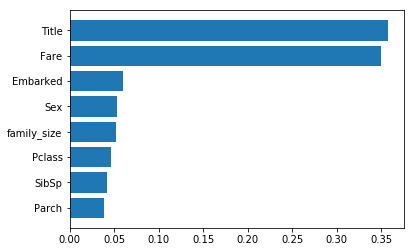

In [44]:
pos = features_rf['feature'].index.tolist()
features_rf.loc[pos, 'feature']
# plt.plot(features_rf['importance'],kind='bar')
plt.barh(range(len(features_rf)),features_rf['importance'][::-1])
plt.yticks(range(len(features_rf)), features_rf['feature'][::-1])


Int64Index([4, 6, 5, 7, 1, 0, 3, 2], dtype='int64')

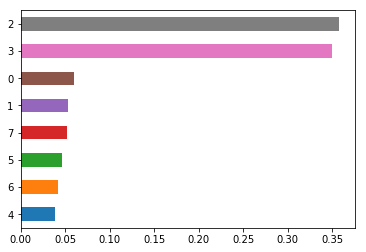

In [29]:
# features_rf['importance'][::-1].plot(kind='barh')
# pos = features_rf['importance'][::-1].index
pos
plt.yticks( pos,  )

In [67]:
##stacking
from sklearn import model_selection
from sklearn.model_selection import KFold
ntrain = train_X.shape[0]
ntest = test_X.shape[0]
Seed = 0
k = 5
kf = KFold(n_splits=k, random_state=Seed, shuffle=False)

def get_out_fold(clf, x_train,y_train, x_test):

    train_out = np.zeros((ntrain,))
    test_out = np.zeros((ntest,))
    test_kfolds = np.zeros((ntest, k))

    for i,(train_index, test_index) in enumerate(kf.split(x_train)):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.fit( x_tr, y_tr )
        train_out[test_index] = clf.predict(x_te)

        test_kfolds[:,i] = clf.predict(x_test)

#     test_out = test_kfolds.apply(np.mean, axis=0)
    test_out = test_kfolds.mean(axis=1)
    return train_out.reshape(-1,1), test_out.reshape(-1,1)


In [48]:
# help(model_selection.KFold)

In [49]:
combined.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,family_size,Title,Sex_0,Sex_1
0,22.0,NaN,0,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0,A/5 21171,2,23,1,0
0,22.0,NaN,0,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0,A/5 21171,2,23,1,0
0,34.5,NaN,2,7.8292,"Kelly, Mr. James",0,892,3,0,0,0,330911,1,16,1,0
0,34.5,NaN,2,7.8292,"Kelly, Mr. James",0,892,3,0,0,0,330911,1,16,1,0
1,38.0,C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1,PC 17599,2,51,0,1


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

rf = RandomForestClassifier(n_estimators=500,max_depth=5)
ada = AdaBoostClassifier(n_estimators=500, learning_rate=0.1)
et = ExtraTreesClassifier()
gb = GradientBoostingClassifier()
dt = DecisionTreeClassifier(max_depth=8)
knn = KNeighborsClassifier(n_neighbors=2)
svm = SVC(kernel='linear', C=0.25)


In [57]:
train_X = train_X.values
train_Y = train_Y.values
test_X = test_X.values


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [68]:
rf_oof_train,rf_oof_test = get_out_fold( rf, train_X,train_Y, test_X )
rf_oof_train[:5]
rf_oof_test[:5]
print(rf_oof_train.shape)
print(rf_oof_test.shape)

(891, 1)
(1254, 1)


In [70]:
len(test_X)

1254

In [71]:
x_train = np.concatenate((rf_oof_train,ada_oof_train),axis=1)

NameError: name 'ada_oof_train' is not defined

In [72]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=200,max_depth=5)
xgb.fit(x_train, y_train)
predictions = xgb.predict(x_test)
Stacksubmission = pd.DataFrame({'passenger':combined.PassengerId, 'Survived':predictions})
Stacksubmission.to_csv('titanic_survived_predictions.csv',index=False)


NameError: name 'x_train' is not defined